## PART A (Random points) 

5 Points

In [56]:
import numpy as np

In [57]:
# generate the data
def generate_data(r):
    x1_1 = []
    x1_2 = []
    x2_1 = []
    x2_2 = []
    for i in range(r):
        x1_1.append(np.random.uniform(0,1))
        x1_2.append(np.random.uniform(0,1))
        x2_1.append(np.random.uniform(-1,0))
        x2_2.append(np.random.uniform(-1,0))
        
    data1 = [np.array([1,x1_1[i],x1_2[i],1]) for i in range(r)]
    data2 = [np.array([1,x2_1[i],x2_2[i],0]) for i in range(r)]
    data = data1 + data2

    data = np.array(data)
    np.random.shuffle(data)
    return data

data = generate_data(1000)

In [58]:
data.shape

(2000, 4)

In [59]:
print(data)

[[ 1.          0.97110621  0.50657444  1.        ]
 [ 1.         -0.91048165 -0.3124122   0.        ]
 [ 1.         -0.51047382 -0.73992186  0.        ]
 ...
 [ 1.         -0.19915777 -0.78791059  0.        ]
 [ 1.         -0.47805851 -0.08758988  0.        ]
 [ 1.          0.91150677  0.99301079  1.        ]]


In [60]:
# Random dataset for PART A
# [x1, x2, x3, Y]
data

array([[ 1.        ,  0.97110621,  0.50657444,  1.        ],
       [ 1.        , -0.91048165, -0.3124122 ,  0.        ],
       [ 1.        , -0.51047382, -0.73992186,  0.        ],
       ...,
       [ 1.        , -0.19915777, -0.78791059,  0.        ],
       [ 1.        , -0.47805851, -0.08758988,  0.        ],
       [ 1.        ,  0.91150677,  0.99301079,  1.        ]])

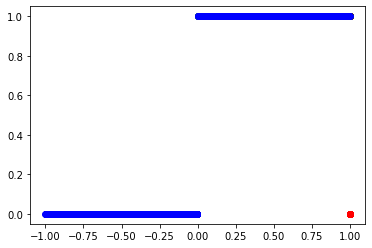

In [61]:
# Plot data
import matplotlib.pyplot as plt 
plt.plot(data[:,0],data[:,3],'ro')
plt.plot(data[:,1],data[:,3],'go')
plt.plot(data[:,2],data[:,3],'bo')

In [62]:
def y_hat(w,datax = []):
    y = 0
    for i in range(len(datax)):
        y += w*datax[i]
    return y

In [63]:
import math

In [64]:
def cost_function(w, datax = []):
    S = []
    Y = []
    L = 0
    D = 0
    for i in range(len(datax[0])-1):
        Y.append(y_hat(w, datax[:,i]))
    for i in range(len(Y)):
        temp = 0
        for j in range(len(Y)):
            temp += math.exp(Y[j])
        S.append(math.exp(Y[i])/temp)
    for i in range(len(S)):
        D += -1/(len(Y))*math.log(S[i])
    L = 1/len(datax)*D
    return L

In [65]:
def GDS(w, alpha, datax = []):
    S = []
    Y = []
    L = 0
    D = 0
    for i in range(len(datax[0])-1):
        Y.append(y_hat(w, datax[:,i]))
    for i in range(len(Y)):
        temp = 0
        for j in range(len(Y)):
            temp += math.exp(Y[j])
        S.append(math.exp(Y[i])/temp)
    for i in range(len(S)):
        D += -1/(len(Y))*(1/(np.log(10)*S[i]))
    L = -1/len(datax)*D*alpha
    return L

In [87]:
# Perform logistic regression
# 1. Compute cost function
# 2. Compute Gradient function
# Use the lecture slides as reference for equations
cost = cost_function(0.001, data)
GDF = GDS(0.00001, 0.001, data)

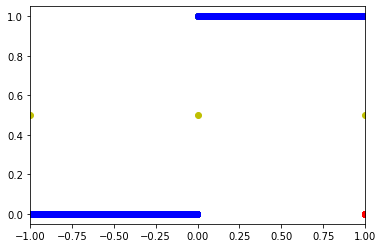

In [94]:
# Plot your hypothesis function that classifies the dataset
values = []
x_vals = []
for i in range(int(-len(data)/2),int(len(data)/2)):
    values.append(1/(1+math.exp(-cost*i)))
    x_vals.append(i)
plt.xlim(-1,1)
plt.plot(x_vals, values,'yo')
plt.plot(data[:,0],data[:,3],'ro')
plt.plot(data[:,1],data[:,3],'go')
plt.plot(data[:,2],data[:,3],'bo')

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()

In [139]:
# Repeat using sklearn library to obtain you hypothesis and plot it
log = LogisticRegression(random_state=0).fit(data[:,:3],data[:,3])

samples = log.predict_proba(data[:,:3])
score = log.score(data[:,:3],data[:,3])
print(score)
print(samples)

1.0
[[7.01993770e-05 9.99929801e-01]
 [9.99662184e-01 3.37815634e-04]
 [9.99696457e-01 3.03542566e-04]
 ...
 [9.98283703e-01 1.71629714e-03]
 [9.76436357e-01 2.35636427e-02]
 [4.65348971e-06 9.99995347e-01]]


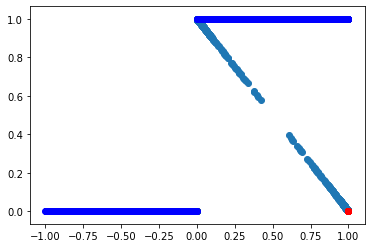

In [140]:
plt.scatter(samples[:,0],samples[:,1])
plt.plot(data[:,0],data[:,3],'ro')
plt.plot(data[:,1],data[:,3],'go')
plt.plot(data[:,2],data[:,3],'bo')

## PART B (Diabetes Dataset)

5 Points

In [69]:
# Load the diabetes dataset
# Analyze the features (plot graphs and explain your findings)
# Split data into Training and Test and predict accuracy

In [141]:
import pandas as pd

In [142]:
data1 = pd.read_csv('C:/Users/balto/OneDrive/Desktop/CMPE257/CMPE257_HW3/data-03-diabetes.csv')

In [167]:
data1 = np.array(data1)
print(data1)

[[-0.882353  -0.145729   0.0819672 ... -0.766866  -0.666667   1.       ]
 [-0.0588235  0.839196   0.0491803 ... -0.492741  -0.633333   0.       ]
 [-0.882353  -0.105528   0.0819672 ... -0.923997   0.         1.       ]
 ...
 [-0.411765   0.21608    0.180328  ... -0.857387  -0.7        1.       ]
 [-0.882353   0.266332  -0.0163934 ... -0.768574  -0.133333   0.       ]
 [-0.882353  -0.0653266  0.147541  ... -0.797609  -0.933333   1.       ]]


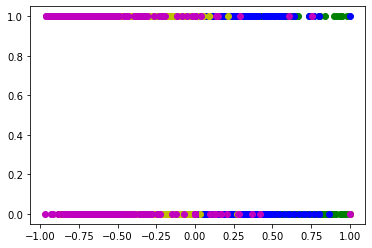

In [155]:

plt.plot(data1[:,0],data1[:,8],'ro')
plt.plot(data1[:,1],data1[:,8],'go')
plt.plot(data1[:,2],data1[:,8],'bo')
plt.plot(data1[:,3],data1[:,8],'yo')
plt.plot(data1[:,4],data1[:,8],'mo')

In [157]:
log = LogisticRegression(random_state=0).fit(data1[:,:8],data1[:,8])

samples = log.predict_proba(data1[:,:8])
score = log.score(data1[:,:8],data1[:,8])
print(score)
print(samples)

0.7704485488126649
[[0.0566008  0.9433992 ]
 [0.78356857 0.21643143]
 [0.04780537 0.95219463]
 ...
 [0.15422468 0.84577532]
 [0.27206715 0.72793285]
 [0.08658655 0.91341345]]


In [166]:
data2 = data1[:,0] + data1[:,8]
print(data2)

[ 0.117647  -0.0588235  0.117647   0.         0.588235  -0.647059
  1.176471  -0.764706  -0.0588235  0.470588   0.176471   1.176471
 -0.882353  -0.176471   0.        -0.176471   0.117647  -0.882353
  0.352941   0.9411765 -0.176471   0.0588235  0.176471  -0.176471
  0.117647   1.529412   0.588235   0.588235  -0.647059   0.352941
  0.705882   1.176471   0.470588   1.294118   0.0588235 -0.764706
 -0.529412   0.352941   0.823529   0.823529   0.0588235  0.823529
  0.         0.117647   0.235294  -0.176471   0.823529   0.117647
  0.117647   0.588235  -0.0588235  0.823529   0.117647  -0.176471
  1.         1.         1.         0.235294  -0.0588235  0.588235
  0.235294  -0.176471   0.588235   0.         0.235294   0.117647
  0.470588  -0.764706   0.588235   0.529412   0.470588   0.117647
  0.117647   0.823529   0.588235   0.         0.235294   0.352941
  0.235294   0.823529   1.        -0.411765   0.235294   1.529412
  0.235294   0.764706   0.117647   0.117647   0.470588   0.823529
 -0.529412

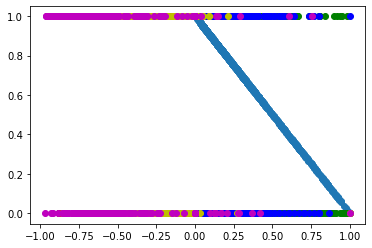

In [158]:
plt.scatter(samples[:,0],samples[:,1])
plt.plot(data1[:,0],data1[:,8],'ro')
plt.plot(data1[:,1],data1[:,8],'go')
plt.plot(data1[:,2],data1[:,8],'bo')
plt.plot(data1[:,3],data1[:,8],'yo')
plt.plot(data1[:,4],data1[:,8],'mo')